# Subject 1: CO2 concentration in the atmosphere since 1958

## The Keeling Curve and purpose of the quantitative analysis

Since 1958, American scientists Charles David Keeling has performed continuous measurement of atmospheric carbon dioxide (CO2) at the Mauna Loa Observatory in Hawaii.This long-term dataset has become known as the Keeling Curve, serving as clear evidence of the ongoing increase in atmospheric CO2 concentrations, which is primarily caused by human acttivity.

The initial objective of the observations was to study seasonal variation in CO2, which was occured because of natural processes such as photosynthesis and respiration. Over time, however, the focuses eventually turned to understanding the long-term upward trend in the context of climat change.This was occured due to the steady year over year increase in CO2 concentrations provided measurable evidence of impact of human activities, particularly fossil fuel combustions on the global ecosystem.

## Objectives of the Quantitative analysis

Quantitative evaluation aims to explore and model the time series of CO2 measurements from Mauna Loa.

Specifically, the objectives are:
    
- to create a plot showing the superposition of seasonal oscillations and a slower systematic trend.
- to separate the seasonal component and describe it.
- to construct a model for the long-term trend and estimates its parameters, i.e. slope and offset.
- to extrapolate the trend-up to the year 2025, providing a forecast for future changes in concetration of CO2 in atmosphere.

The data used in this quantitative analysis is a local copy of CO2 observations from the [Scripps CO2 Program](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html).

### Load and prepare the dataset to perform the quantitative analysis

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np

Importing the CO2 dataset, which was downloaded from the [Scripps CO2 Program website](https://scrippsco2.ucsd.edu/data/atmospheric_co2/primary_mlo_co2_record.html).

As the original file includes metadata in the firs 61 rows, it is necessary to skip them when reading the file.
Afterwards, the column names was assigned.

In [16]:
df=pd.read_csv("monthly_in_situ_co2_mlo.csv", skiprows=61)
df.columns=['Year', 'Month', 'Excel', 'DecimalDate', 'CO2', 'CO2_season_adj', 
           'CO2_fit', 'CO2_adj_fit', 'CO2_filled', 'CO2_adj_filled', 'Sta']

## Filter out invalid of missing values

Some rows may contain non-numeric values, particularly in the "Year" columns

In [45]:
df=df[pd.to_numeric(df['Year'], errors='coerce').notnull()].copy()

The "Year" and "Month" columns were converted to integers, which ensure the CO2 values are numeric.

In [46]:
df['Year']=df['Year'].astype(int)
df['Month']=df['Month'].astype(int)
df['CO2']=pd.to_numeric(df['CO2'], errors='coerce')

A full datetime column was created to represent mid-month measurements. 

In [47]:
df['Date']=pd.to_datetime(dict(Year=df['Year'], Month=df['Month'], Day=15))

**"Date"** column was set as the index of the DataFrame to facilitate time series analysis

In [48]:
df=df[df['CO2']>0]
df.set_index('Date', inplace=True)

## Plot the Raw CO2 time series

It is possible to visualize the monthly CO2 measurement from the **Mauna Loa Observatory**.

The first prot illustrates the raw atmospheric CO2 concentrations over time, showing both seasonal periodic oscillations and a long-term upward trend.

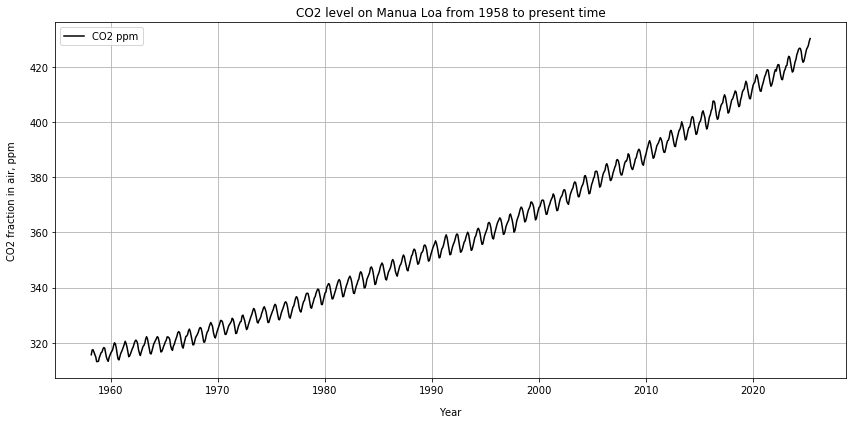

In [49]:
plt.figure(figsize=(12,6))
plt.plot(df.index, df['CO2'], label='CO2 ppm', color='black')
plt.title('CO2 level on Manua Loa from 1958 to present time')
plt.xlabel('Year',labelpad=12)
plt.ylabel('CO2 fraction in air, ppm', labelpad=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [19]:
Decomposition=seasonal_decompose(df['CO2'], model='additive', freq=12)
Seasonal=Decomposition.seasonal.dropna()
Seasonal_Monthly=Seasonal.to_frame(name='Seasonality')
Seasonal_Monthly['Month']=Seasonal_Monthly.index.month
Monthly_Avg=Seasonal_Monthly.groupby('Month')['Seasonality'].mean()


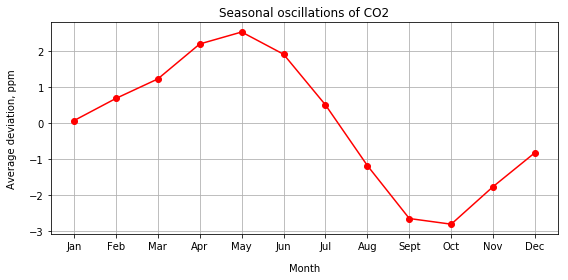

In [20]:
plt.figure(figsize=(8,4))
plt.plot(Monthly_Avg.index, Monthly_Avg.values, marker='o', linestyle='-', color='red')
plt.title('Seasonal oscillations of CO2')
plt.xlabel('Month',labelpad=12)
plt.ylabel('Average deviation, ppm', labelpad=12)

plt.xticks(range(1,13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
                         'Jul', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec'])

plt.grid(True)
plt.tight_layout()
plt.show()

In [34]:
df_clean['CO2']=pd.to_numeric(df_clean['CO2'], errors='coerce')
df_clean['DecimalDate']=pd.to_numeric(df_clean['DecimalDate'], errors='coerce')
df_clean=df_clean.dropna(subset = ['CO2', 'DecimalDate'])
x = df_clean['DecimalDate'].values
y = df_clean['CO2'].values

x_mean = np.mean(x)
y_mean = np.mean(y)

numerator = np.sum((x-x_mean)*(y-y_mean))
denominator = np.sum((x-x_mean)**2)

a_tr = numerator / denominator
b_tr = y_mean - a_tr*x_mean

y_pred_tr =  a_tr*x + b_tr

x_future = np.arange(x.max(), 2026.0, 1/12)
y_future_pred = a_tr*x_future + b_tr

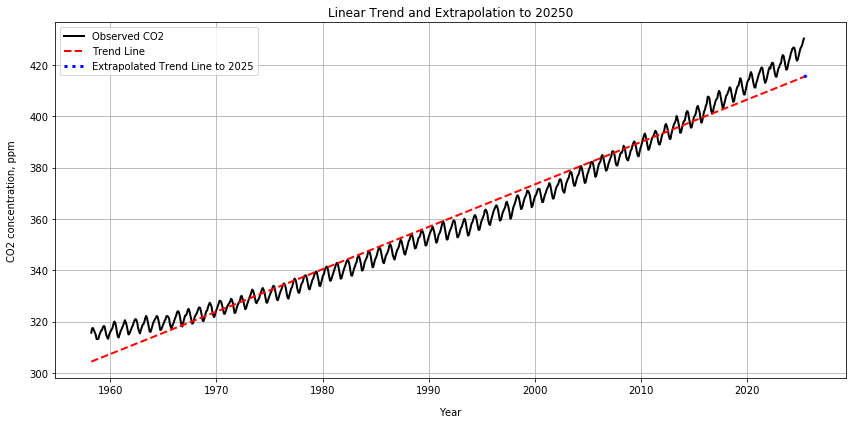

In [38]:
plt.figure(figsize=(12,6))

plt.plot(x,y, label='Observed CO2', color='black', linewidth=2)

plt.plot(x,y_pred_tr, label='Trend Line', color='red', linestyle='--', linewidth=2)
plt.plot(x_future, y_future_pred, label='Extrapolated Trend Line to 2025', color='blue', linestyle=':', linewidth=3)
plt.xlabel('Year', labelpad=12)
plt.ylabel('CO2 concentration, ppm', labelpad=12)
plt.title('Linear Trend and Extrapolation to 20250')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

